In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import cv2

def plot_image(image, color, title):
    plt.grid(False)
    plt.title(title)
    if (color == 'colored'):
        plt.imshow(image)
    elif (color == "gray"):
        plt.imshow(image, cmap='gray', interpolation="bicubic")


In [2]:
def BGR2RGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

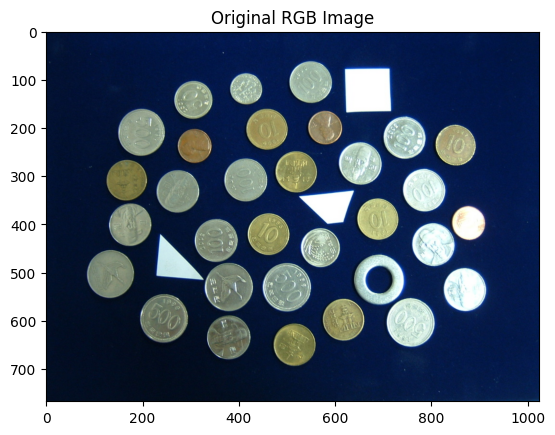

In [3]:
image = cv2.imread('coins.jpg')
result = image.copy()
RGB_image = BGR2RGB(image)
plot_image(RGB_image, "colored", "Original RGB Image")


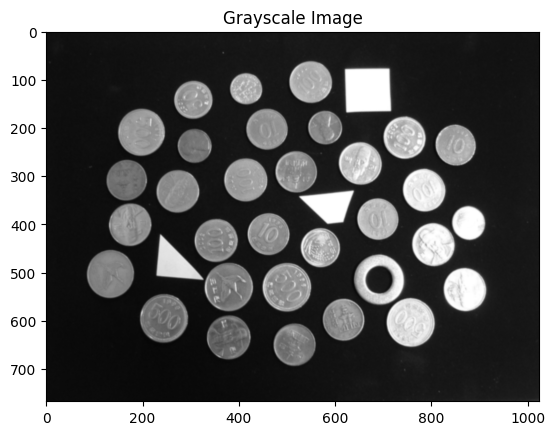

In [4]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plot_image(gray_image, "gray", "Grayscale Image")


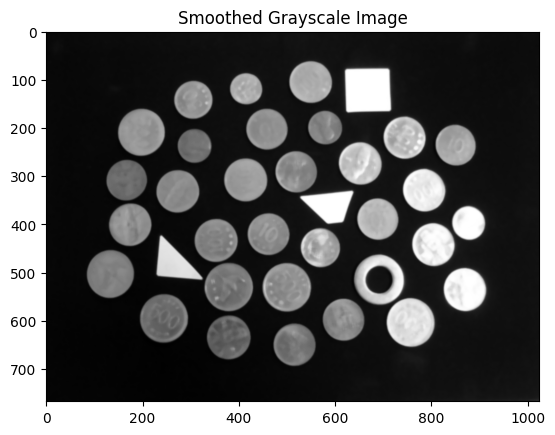

In [5]:
median_image = cv2.medianBlur(gray_image, 7)
plot_image(median_image, "gray", "Smoothed Grayscale Image")


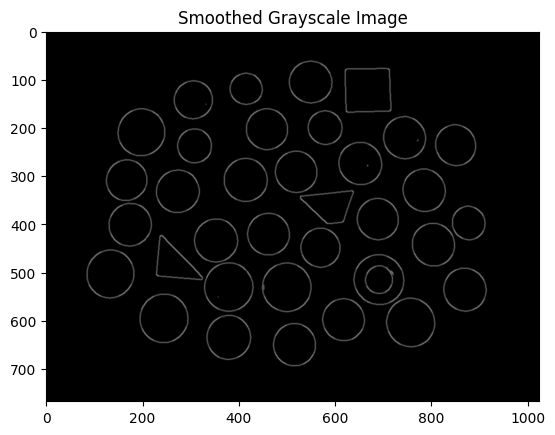

In [6]:
edges = cv2.Canny(median_image, 250, 280)
plot_image(edges, "gray", "Smoothed Grayscale Image")


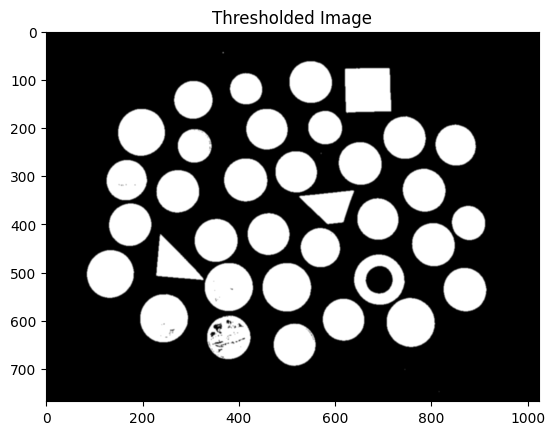

In [7]:
ret, thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret, thresh = cv2.threshold(gray_image, ret-10, 255, cv2.THRESH_BINARY)

plot_image(thresh, "gray", "Thresholded Image")

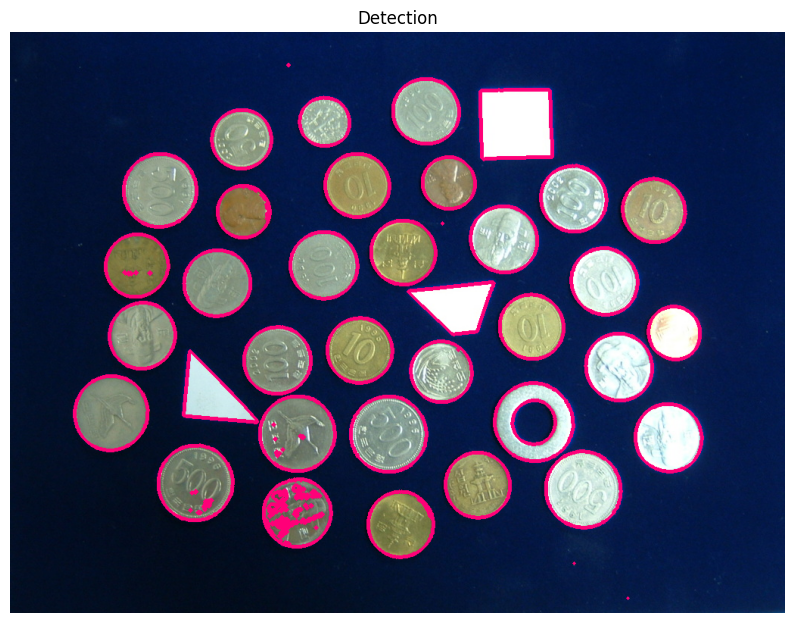

In [8]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# sorted_ctrs = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

approxPolyCurves = image.copy()
for i, ctr in enumerate(contours):
    epsilon = 0.001 * cv2.arcLength(ctr, True)
    approx = cv2.approxPolyDP(ctr, epsilon, True)
    cv2.drawContours(approxPolyCurves, [approx], -1, (120, 0, 255), 3)

plt.figure(figsize=(10, 10))
plt.title("Detection")
plt.axis('off')
plt.imshow(cv2.cvtColor(approxPolyCurves, cv2.COLOR_BGR2RGB))
plt.show()


Total Value: 4280


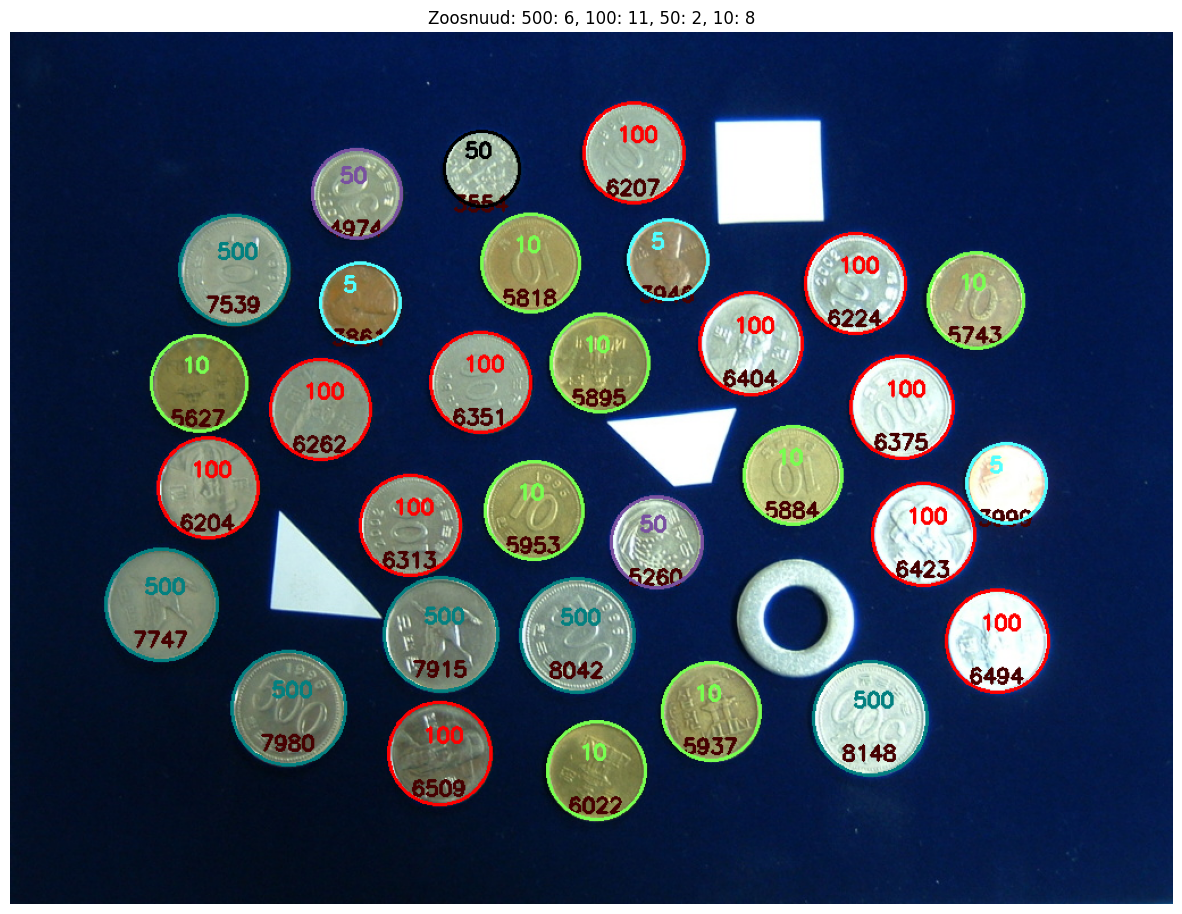

In [10]:

circleAreas = []
circleCenters = []
circles = {}
coins = {"500": 0, "100": 0, "50": 0, "10": 0, "5": 0, "1": 0}

for i, ctr in enumerate(contours):
    epsilon = 0.001 * cv2.arcLength(ctr, True)
    approx = cv2.approxPolyDP(ctr, epsilon, True)
    
    if len(approx) > 85:
        (x, y), radius = cv2.minEnclosingCircle(ctr)
        
        if thresh[int(y)][int(x)] != 0:
            area = int(math.pi * (radius ** 2))
            circles[radius] = (int(x), int(y))
            color = (0, 0, 0)

            if 9000 > area > 7500:
                coins["500"] += 1
                text = "500"
                color = (128, 128, 2)
            elif 7500 > area >= 6200:
                coins["100"] += 1
                text = "100"
                color = (0, 0, 255)
            elif 6200 > area >= 5500:
                coins["10"] += 1
                text = "10"
                color = (80, 255, 120)
            elif 5500 > area >= 4900:
                coins["50"] += 1
                text = "50"
                color = (160, 80, 120)
            elif 4900 > area >= 3800:
                coins["5"] += 1
                text = "5"
                color = (255, 255, 80)
            
            cv2.putText(result, str(text), (int(x - 15), int(y - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
            cv2.putText(result, str(area), (int(x - 25), int(y + 37)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (1, 1, 70), 2)
            cv2.circle(result, (int(x), int(y)), int(radius), color, 2)

cv2.imwrite("result.jpg", result)

fig, ax = plt.subplots(figsize=(15, 25))
ax.axis('off')
ax.set_title("Zoosnuud: 500: {0}, 100: {1}, 50: {2}, 10: {3}".format(coins["500"], coins["100"], coins["50"], coins["10"]))
ax.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

total_value = coins["500"] * 500 + coins["100"] * 100 + coins["50"] * 50 + coins["10"] * 10
print("Total Value: {}".format(total_value))

plt.show()
